<h3 align=middle style="line-height:500%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Project Three, Question Two
</font>
</h3>

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part 1 :
</font>
</h3>

Preprocessing:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
train = pd.read_csv(r"C:\Users\ROG\Desktop\Worklife\Data\MLBootcamp\Project3\Part2\Data\train_data.csv")
test = pd.read_csv(r"C:\Users\ROG\Desktop\Worklife\Data\MLBootcamp\Project3\Part2\Data\test_data.csv")
titles = pd.read_csv(r"C:\Users\ROG\Desktop\Worklife\Data\MLBootcamp\Project3\Part2\Data\title_brand.csv")

C:\Users\ROG\AppData\Local\Temp\ipykernel_20404\596588134.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r"C:\Users\ROG\Desktop\Worklife\Data\MLBootcamp\Project3\Part2\Data\train_data.csv")


In [3]:
train.isna().sum()

overall                0
vote              647476
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             348331
reviewerName         227
reviewText             0
summary               76
unixReviewTime         0
dtype: int64

In [4]:
test.isna().sum()

vote              15067
verified              0
reviewTime            0
reviewerID            0
asin                  0
style              8496
reviewerName          4
reviewText            0
summary               2
unixReviewTime        0
dtype: int64

We need to handle the Nan values.

"vote" nans are where there has been no helpful vote for the review, therefore we will fill the nan values in this column with 0s.

"reviewerName" is not that important in our sentiment analysis and the number of nan data is limited so we won't be needing to handel that.

"summary" is not pretty important too and because of the number of nans compared to the whole dataset, we will not interfere in this case too.

"style" won't affect the result much (or at least shouldn't), and thence we will drop the respective column.

We also have a time column so probably there is no need for "unixTime".

In [5]:
train.drop(columns=['style', 'unixReviewTime'], inplace=True)
test.drop(columns=['style', 'unixReviewTime'], inplace=True)

train["vote"].fillna(0, inplace=True)
test["vote"].fillna(0, inplace=True)

In [6]:
train.isna().sum(), train.shape

(overall           0
 vote              0
 verified          0
 reviewTime        0
 reviewerID        0
 asin              0
 reviewerName    227
 reviewText        0
 summary          76
 dtype: int64,
 (838944, 9))

In [7]:
test.isna().sum(), test.shape

(vote            0
 verified        0
 reviewTime      0
 reviewerID      0
 asin            0
 reviewerName    4
 reviewText      0
 summary         2
 dtype: int64,
 (20000, 8))

Now that we have handled nans, we can check our datatypes and other things:

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   overall       838944 non-null  int64 
 1   vote          838944 non-null  object
 2   verified      838944 non-null  bool  
 3   reviewTime    838944 non-null  object
 4   reviewerID    838944 non-null  object
 5   asin          838944 non-null  object
 6   reviewerName  838717 non-null  object
 7   reviewText    838944 non-null  object
 8   summary       838868 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 52.0+ MB


In [9]:
train

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,2,0,False,2016-11-11,A2OSUEZJIN7BI,0511189877,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn
1,5,0,True,2016-06-06,A2NETQRG6JHIG7,0511189877,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?
2,4,0,True,2016-03-10,A12JHGROAX49G7,0511189877,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.
3,5,0,True,2016-01-14,A1KV65E2TMMG6F,0511189877,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote
4,5,0,True,2016-10-20,A280POPEWI0NSA,0594459451,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord
...,...,...,...,...,...,...,...,...,...
838939,5,0,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,Puddzee,These are my favorite charging cords for a few...,Worth the price.
838940,1,0,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING
838941,3,0,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...
838942,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.


In [10]:
train[['verified']] = train[['verified']].replace([False, True], [0, 1])
test[['verified']] = test[['verified']].replace([False, True], [0, 1])

train['vote'] = pd.to_numeric(train['vote'], errors='coerce').fillna(0)
test['vote'] = pd.to_numeric(test['vote'], errors='coerce').fillna(0)

train["reviewTime"] = pd.to_datetime(train["reviewTime"])
test["reviewTime"] = pd.to_datetime(test["reviewTime"])

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   overall       838944 non-null  int64         
 1   vote          838944 non-null  float64       
 2   verified      838944 non-null  int64         
 3   reviewTime    838944 non-null  datetime64[ns]
 4   reviewerID    838944 non-null  object        
 5   asin          838944 non-null  object        
 6   reviewerName  838717 non-null  object        
 7   reviewText    838944 non-null  object        
 8   summary       838868 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 57.6+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   vote          20000 non-null  float64       
 1   verified      20000 non-null  int64         
 2   reviewTime    20000 non-null  datetime64[ns]
 3   reviewerID    20000 non-null  object        
 4   asin          20000 non-null  object        
 5   reviewerName  19996 non-null  object        
 6   reviewText    20000 non-null  object        
 7   summary       19998 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.2+ MB


Finally we will go for the questions:

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 1 :
</font>
</h3>

Checking for imbalancement:

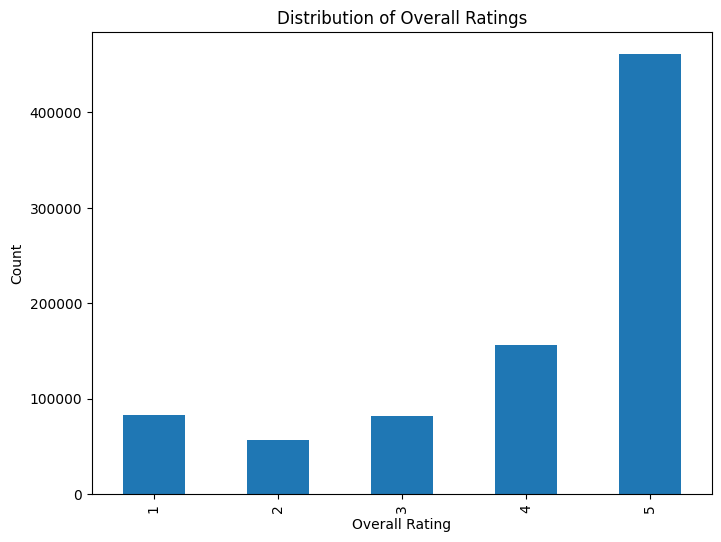

In [13]:
plt.figure(figsize=(8, 6))
train['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

Adding some mathematical backbone to our implentation:

In [14]:
rating_distribution = train['overall'].value_counts().sort_index()
is_balanced = rating_distribution.min() / rating_distribution.max() >= 0.7
print("Is the dataset balanced?", is_balanced)

Is the dataset balanced? False


As it is shown, we need to handle the imbalancement.

We need to make sure that no overfitting is being made, so if we have got overfitting in our final results this is a checkpoint for sure!

We will use the IMBlearn random oversampler and undersampler for the purpose and in order to make a cautious step overfitting wise, we will bring all the samples to 250000 occurances:

In [15]:
train["overall"].value_counts()

overall
5    461485
4    156514
1     82950
3     81239
2     56756
Name: count, dtype: int64

In [16]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy={1: 82950, 2: 56756, 3: 81239, 4: 149999, 5: 149999}, random_state=78)
oversampler = RandomOverSampler(sampling_strategy={1: 150000, 2: 150000, 3: 150000, 4: 150000, 5: 150000}, random_state=78)

X_resampledo, y_resampledo = undersampler.fit_resample(train.drop(columns=["overall"]), train['overall'])
X_resampled, y_resampled = oversampler.fit_resample(X_resampledo, y_resampledo)

In [17]:
balanced_distribution = y_resampled.value_counts().sort_index()
print("Balanced Rating Distribution:")
print(balanced_distribution)

Balanced Rating Distribution:
overall
1    150000
2    150000
3    150000
4    150000
5    150000
Name: count, dtype: int64


We will use this method when encountering the main model training results and not in the analytical parts.

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 2 :
</font>
</h3>


After the imbalancement handling, we will go for positive, neutral, and negative wordclouds:

In [18]:
nltk.download('stopwords')
positive_reviews = train[train['overall'].isin([4, 5])]
neutral_reviews = train[train['overall'] == 3]
negative_reviews = train[train['overall'].isin([1, 2])]
positive_text = " ".join(positive_reviews['reviewText'])
neutral_text = " ".join(neutral_reviews['reviewText'])
negative_text = " ".join(negative_reviews['reviewText'])
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
wordcloud_positive = WordCloud(stopwords=stop_words, background_color='white').generate(positive_text)
wordcloud_neutral = WordCloud(stopwords=stop_words, background_color='white').generate(neutral_text)
wordcloud_negative = WordCloud(stopwords=stop_words, background_color='white').generate(negative_text)

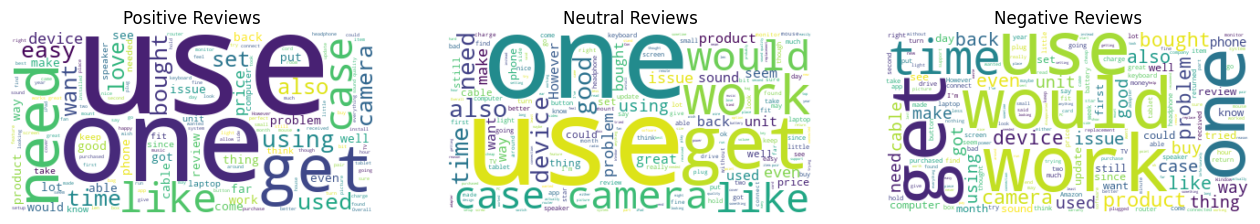

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis("off")

plt.subplot(132)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews')
plt.axis("off")

plt.subplot(133)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis("off")

plt.show()

As it is shown, we still have some words that are not meant to be there and they are in every class so we will try to delete them too in order to get a better result:

In [21]:
stop_words.add('one')
stop_words.add('get')
stop_words.add('camera')
stop_words.add('need')
stop_words.add('product')
stop_words.add('work')
stop_words.add('time')
stop_words.add('use')
stop_words.add('device')
stop_words.add('would')
stop_words.add('also')
stop_words.add('bought')
stop_words.add('case')
stop_words.add('like')

In [22]:
wordcloud_positive = WordCloud(stopwords=stop_words, background_color='white').generate(positive_text)
wordcloud_neutral = WordCloud(stopwords=stop_words, background_color='white').generate(neutral_text)
wordcloud_negative = WordCloud(stopwords=stop_words, background_color='white').generate(negative_text)

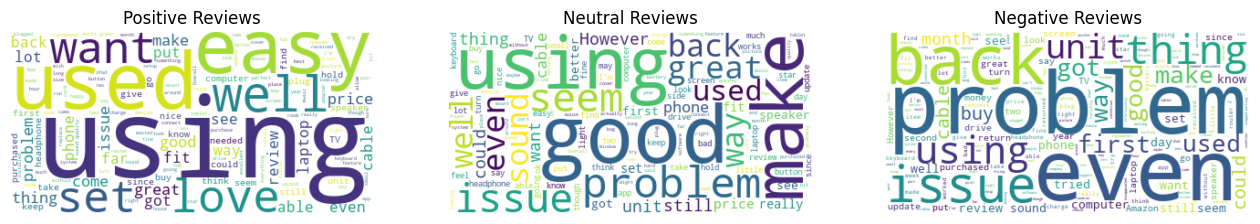

In [23]:
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis("off")

plt.subplot(132)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews')
plt.axis("off")

plt.subplot(133)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis("off")

plt.show()

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 3 :
</font>
</h3>


Now we will find the top 10 useful users:

In [24]:
top_reviewers = train.groupby('reviewerID')['vote'].sum().reset_index()
top_reviewers = top_reviewers.sort_values(by='vote', ascending=False)
top_10_reviewers = top_reviewers.head(10)
top_10_reviewer_info = top_10_reviewers.merge(train[['reviewerID', 'reviewerName']], on='reviewerID')
top_10_reviewer_info = top_10_reviewer_info.drop_duplicates(subset='reviewerName')
t10df = pd.DataFrame(top_10_reviewer_info[['reviewerName', 'vote']])
print("Top 10 Reviewers with Most Votes:")
t10df

Top 10 Reviewers with Most Votes:


,reviewerName,vote
0,Benson Leung,4572.0
29,Obi Wan,1608.0
58,Chris Winter,1352.0
62,Mayra S.,1342.0
81,VermontGuy,1337.0
88,Michael,1230.0
220,PhotoGraphics,1209.0
288,Nicholas,1188.0
311,NLee the Engineer,1103.0
342,David H,1045.0


<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 4 :
</font>
</h3>


Original one :

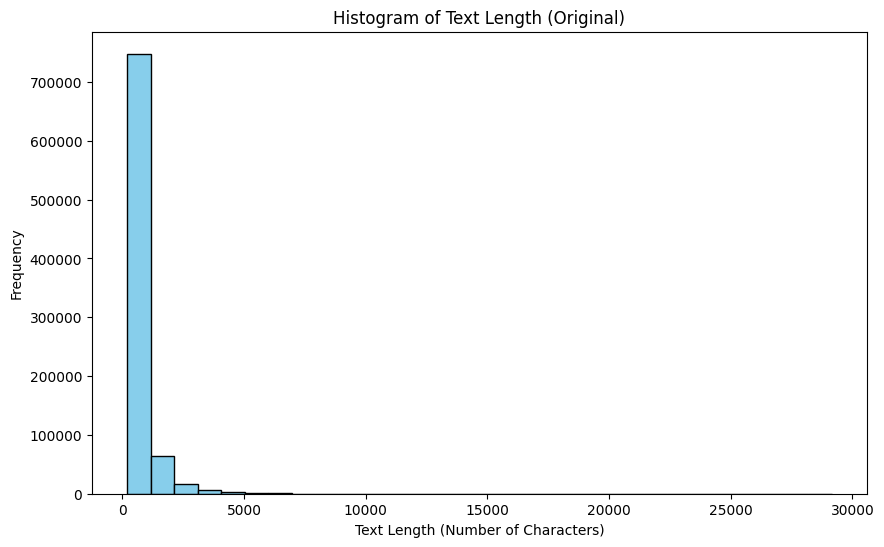

In [25]:
train['text_length'] = train['reviewText'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(train['text_length'], bins=30, color='skyblue', edgecolor="black")
plt.title('Histogram of Text Length (Original)')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

Let's find the filter boundaries with the IQR method:

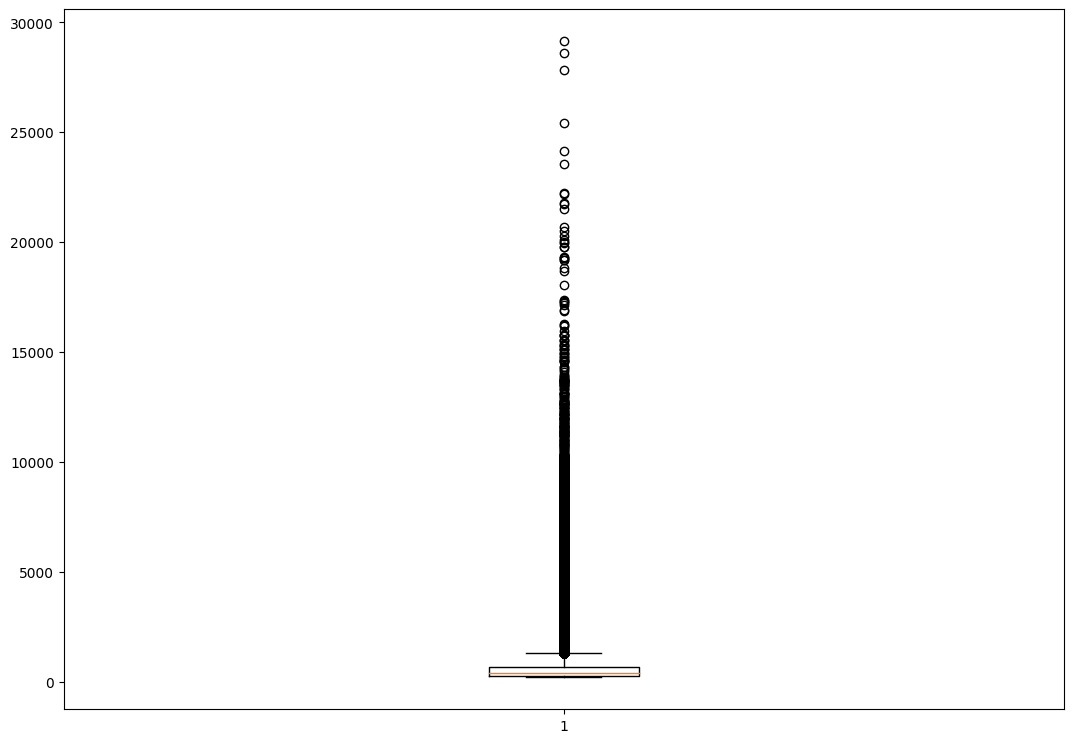

In [26]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot((train["text_length"]))
plt.show()

In [27]:
m = np.mean(train["text_length"])
q3, q1 = np.percentile(train["text_length"], [75 ,25])
iqr = q3 - q1
lower = m - 1.5*iqr
upper = m + 1.5*iqr
(lower, upper)

(-5.312615621543273, 1254.6873843784567)

We don't have a -5 characters long word, so we will consider the lower bound as 0.

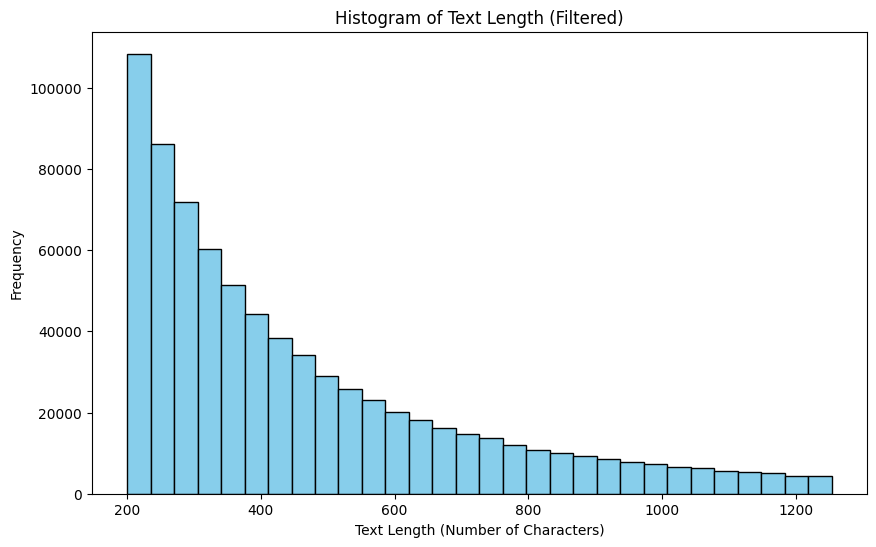

In [28]:
filtered_data = train[(train['text_length'] >= 0) & (train['text_length'] <= upper)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['text_length'], bins=30, color='skyblue', edgecolor="black")
plt.title('Histogram of Text Length (Filtered)')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

Based on the analysis of the histogram of text lengths, it seems that setting a constraint on the text length during modeling could be beneficial. 

The filtered histogram with a minimum of 0 characters and a maximum of approximately 12500 characters resulted in a smoother distribution of text lengths.

Therefore, it is advisable to impose constraints on the text length during modeling.

<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 5 :
</font>
</h3>

10 most five stars

In [29]:
five_star_reviews = train[train['overall'] == 5]

top_products = five_star_reviews.groupby('asin')['overall'].count().reset_index()
top_products = top_products.rename(columns={'overall': 'num_5_star_reviews'})
top_products = top_products.sort_values(by='num_5_star_reviews', ascending=False)
top_products = top_products.merge(titles[['asin', 'title', 'brand']], on='asin', how='left')

In [30]:
top_10_products = top_products.head(10)
t10pdf = pd.DataFrame(top_10_products[['brand', 'title', 'num_5_star_reviews']])
print("10 most five stars rated products:")
t10pdf

10 most five stars rated products:


,brand,title,num_5_star_reviews
0,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,1163
1,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700),659
2,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...,600
3,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,598
4,Logitech,Logitech M570 Wireless Trackball Mouse &ndash;...,552
5,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,529
6,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,471
7,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,448
8,"Arlo Technologies, Inc",Arlo - Wireless Home Security Camera System | ...,433
9,Samsung,Samsung 850 EVO 250GB 2.5-Inch SATA III Intern...,431


<h3 align=left style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 6 :
</font>
</h3>

10 most reviewed brands and their score mean 

In [31]:
merged_data = pd.merge(train, titles, on='asin')

brand_stats = merged_data.groupby('brand').agg({'overall': ['count', 'mean']})
brand_stats.columns = ['num_reviews', 'average_rating']
top_10_brands = brand_stats.sort_values(by='num_reviews', ascending=False).head(10)

In [32]:
top_10_brands

,num_reviews,average_rating
brand,,
Logitech,17066,3.954061
Samsung,15409,3.941268
AmazonBasics,13213,4.201468
Sony,12436,3.938726
Asus,11928,3.855550
Anker,9860,4.244320
TP-LINK,9773,3.928681
SanDisk,8400,3.958810
Sabrent,7320,4.028005
